In [5]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# **** Algoritmo predictivo correspondiente a la turbidez de agua ****
#Los datos son almacenados para 1 Litro de agua
turbidezMedidaEnVoltaje = [4.26, 4.22, 4.17, 3.63, 3.39]
concentradoAgregado = [50,51,54,100,110]

datos = pd.DataFrame({'Turbidez': turbidezMedidaEnVoltaje, 'Concentrado Agregado':concentradoAgregado})
datos.head()



,Turbidez,Concentrado Agregado
0,4.26,50
1,4.22,51
2,4.17,54
3,3.63,100
4,3.39,110


Text(0.5, 1.0, 'Distribución de floculacion')

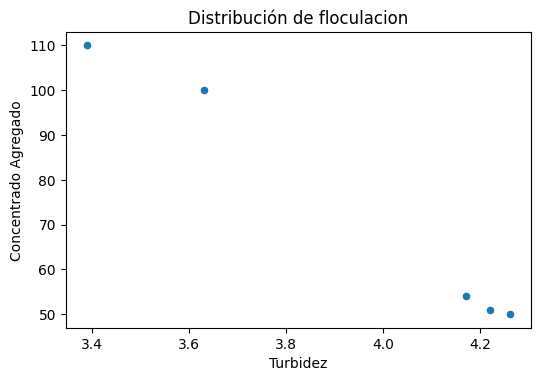

In [6]:
fig, ax = plt.subplots(figsize=(6, 3.84))
datos.plot(x='Turbidez', y='Concentrado Agregado', kind='scatter', ax=ax)
ax.set_title('Distribución de floculacion')

In [7]:
X = datos[["Turbidez"]]
y = datos["Concentrado Agregado"]

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.6,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

prediccion = modelo.predict(X_test)
print(prediccion)

[[120.09031454]
 [ 47.07100592]]


Intercept: [404.61382747]
Coeficiente: [('Turbidez', -83.93023980068514)]
Coeficiente de determinación R^2: 0.9679972699183179


C:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


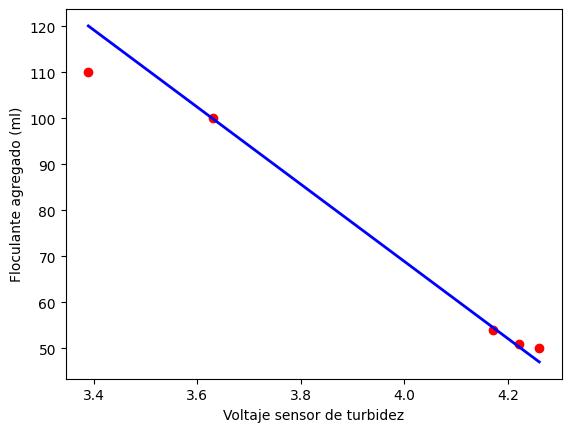

In [8]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

plt.scatter(X, y, color = 'red')
plt.xlabel("Voltaje sensor de turbidez")
plt.ylabel("Floculante agregado (ml)")
plt.plot(X_test, prediccion,  linewidth = 2, color = 'blue')